## Accquire

**imports**

In [17]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# system manipulation
import sys
sys.path.append("./util_")
# import acquire_
# import prepare_

# other
import warnings
warnings.filterwarnings("ignore")

**Get data**

In [9]:
bank = pd.read_csv("./banklist.csv")
bank.head()

,Bank Name†,City†,State†,Cert†,Acquiring Institution†,Closing Date†,Fund
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
2,Silicon Valley Bank,Santa Clara,CA,24735,FirstñCitizens Bank & Trust Company,10-Mar-23,10539
3,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",16-Oct-20,10537


**Understand data**

In [19]:
# look at the shape of the data
bank.shape

(566, 7)

In [20]:
# what columns are in the data
bank.columns

Index(['Bank Name†', 'City†', 'State†', 'Cert†', 'Acquiring Institution†',
       'Closing Date†', 'Fund'],
      dtype='object')

In [21]:
# count all the null values
bank.isna().sum().values.sum() / len(bank)

0.0

In [22]:
# look at the bak infromation
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name†              566 non-null    object
 1   City†                   566 non-null    object
 2   State†                  566 non-null    object
 3   Cert†                   566 non-null    int64 
 4   Acquiring Institution†  566 non-null    object
 5   Closing Date†           566 non-null    object
 6   Fund                    566 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.1+ KB


In [23]:
# look at the distribution of the data
bank.describe()

,Cert†,Fund
count,566.000000,566.000000
mean,31711.392226,10039.545936
std,16477.485768,1112.975725
min,91.000000,4645.000000
25%,20137.000000,10117.250000
50%,32166.000000,10258.500000
75%,35377.250000,10399.750000
max,59017.000000,10543.000000


In [24]:
# count of numeric columns and object columns
numerics_count = len(bank.select_dtypes("number").columns)
objects_count = len(bank.select_dtypes("object").columns)

print("Numeric col count:", numerics_count)
print("object col count:", objects_count)

Numeric col count: 2
object col count: 5


Take aways:

- I have 566 rows and 7 columns
- 2 numeric columns and 5 string columns
- 0 null count
- I also have descriptive statistics of my data

## Prepare

**Rename columns**

In [33]:
# make the columsn lower case
# replace spaces
bank.columns = bank.columns.str.lower().str.replace("†","").str.replace(" ","_")
bank.head(1)

,bank_name,city,state,cert,acquiring_institution,closing_date,fund
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543


**Convert data types**

In [34]:
# view datatypes
bank.dtypes

bank_name                object
city                     object
state                    object
cert                      int64
acquiring_institution    object
closing_date             object
fund                      int64
dtype: object

In [45]:
# count the unique value counts in each column
for i in bank.columns:
    print("_" * 20, i.upper())
    print(bank[i].value_counts().value_counts())

____________________ BANK_NAME
1    534
2     10
3      4
Name: bank_name, dtype: int64
____________________ CITY
1     359
2      53
3      12
4       6
20      1
10      1
6       1
5       1
Name: city, dtype: int64
____________________ STATE
1     5
2     5
10    4
4     4
7     4
3     3
6     2
8     2
11    2
16    2
12    1
76    1
13    1
9     1
14    1
19    1
5     1
23    1
43    1
69    1
93    1
Name: state, dtype: int64
____________________ CERT
1    566
Name: cert, dtype: int64
____________________ ACQUIRING_INSTITUTION
1     201
2      45
3      22
4      12
5       7
6       4
7       3
31      1
12      1
11      1
10      1
9       1
8       1
Name: acquiring_institution, dtype: int64
____________________ CLOSING_DATE
1    146
2     37
3     29
4     20
5     11
7      9
6      6
8      2
9      1
Name: closing_date, dtype: int64
____________________ FUND
1    566
Name: fund, dtype: int64


In [50]:
# covert closing_date data type to date time
bank.closing_date = bank.closing_date.astype("datetime64")

**Drop columns**

In [48]:
# remove redundent columns
bank = bank.drop(columns=["cert"])

**Drop duplicates**

In [ ]:
# remove duplicated rows
bank = bank.drop_duplicates()

**Set index**

In [53]:
# set the date to be the indexinf column
bank = bank.set_index("closing_date")
bank.head(1)

,bank_name,city,state,acquiring_institution,fund
closing_date,,,,,
2023-05-01,First Republic Bank,San Francisco,CA,"JPMorgan Chase Bank, N.A.",10543


**Plot distributions**

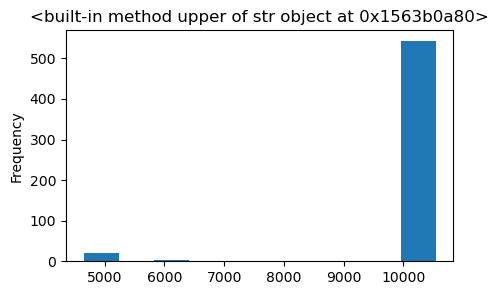

In [54]:
#  Visualize the distribution
plt.figure(figsize=(5,3))
bank.fund.plot(kind="hist")
plt.title("bank fund distribution".upper)
plt.show()

**Sort datetime index**

In [56]:
# reset the index in order
bank = bank.sort_index()
bank.head()

,bank_name,city,state,acquiring_institution,fund
closing_date,,,,,
2000-10-13,Bank of Honolulu,Honolulu,HI,Bank of the Orient,4645
2000-12-14,National State Bank of Metropolis,Metropolis,IL,Banterra Bank of Marion,4646
2001-02-02,First Alliance Bank & Trust Co.,Manchester,NH,Southern New Hampshire Bank & Trust,4647
2001-05-03,Malta National Bank,Malta,OH,North Valley Bank,4648
2001-07-27,"Superior Bank, FSB",Hinsdale,IL,"Superior Federal, FSB",6004


**Frequency of time**

In [65]:
# occurrences of each date
bank.index.value_counts()

2009-10-30    9
2010-04-16    8
2010-08-20    8
2010-04-30    7
2009-07-24    7
             ..
2010-04-09    1
2010-05-21    1
2010-06-11    1
2010-06-18    1
2023-05-01    1
Name: closing_date, Length: 261, dtype: int64

In [64]:
# occurrences of each dates occurrence
bank.index.value_counts().value_counts()

1    146
2     37
3     29
4     20
5     11
7      9
6      6
8      2
9      1
Name: closing_date, dtype: int64

**Check for gaps in time**

In [74]:
# earliest date
min_date = bank.index.min()
min_date

Timestamp('2000-10-13 00:00:00')

In [75]:
# latest date
max_date = bank.index.max()
max_date

Timestamp('2023-05-01 00:00:00')

In [76]:
#see how many unique days we actually have
bank.shape[0], bank.index.nunique()

# here I see that there is a big time gap

(566, 261)

**Find the missing dates**

In [78]:
#establish all the expected dates in our range
expected_date_range = pd.date_range(min_date, max_date)
expected_date_range

DatetimeIndex(['2000-10-13', '2000-10-14', '2000-10-15', '2000-10-16',
               '2000-10-17', '2000-10-18', '2000-10-19', '2000-10-20',
               '2000-10-21', '2000-10-22',
               ...
               '2023-04-22', '2023-04-23', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01'],
              dtype='datetime64[ns]', length=8236, freq='D')

In [80]:
# now which dates are missing
len(expected_date_range.difference(bank.index))

7975

### NEXT: what do I do with the missing dates

**Actions taken and take aways**

- Rename columns
- Convert data types (closing_date)
- Drop columns (cert)
- Drop duplicates (0 count)
- Plot distibution
    - Not normal distribution
- Set and sort date index
- Check for gaps in time (7975 days missing)
    - Erliest time (oct 13, 2000)
    - Latest time (May 1, 2023)